# Приоритезация гипотез и анализ результатов A/B-теста.

Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки интернет-магазина.
- [Приоритизируем гипотезы](#Часть-1.-Приоритизация-гипотез-3)
- [Проанализируем результаты A/B теста.](#Часть-2.-Анализ-результатов-A/B-теста.-4)
- [Сделаем выводы](#Выводы-5)

Краткие выводы: 
- Есть статистическая значимость, положительного отношения конверсии группы B к группе A в 18%. 
- Нет статистической значимости, отрицательного отношения среднего чека группы B к группе A в 1%.

# Импортируем библиотеки

In [8]:
!pip install --upgrade scipy

You should consider upgrading via the 'C:\Users\Andrey\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [9]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Часть 1. Приоритизация гипотез

Подготовили 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
- Применим фреймворк ICE для приоритизации гипотез.
- Применим фреймворк RICE для приоритизации гипотез.
- Сравним приоритизацию гипотез по разным фреймворкам

## Гипотезы

In [10]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [11]:
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [12]:
hypothesis.columns = hypothesis.columns.str.lower()

### Фреймворк - ICE

In [13]:
hypothesis['ice']  = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [14]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Фреймворк - RICE

In [15]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


Положение гипотез сильно поменялось, потому что фреймворк RICE учитывает количество затронутых пользователей. Чем больше пользователей гипотеза охватит, тем выше в приоритете она будет.  Добавление формы подписки затронет больше половины всех пользователей.

# Часть 2. Анализ результатов A/B-теста.

По результатам A/B-теста построим графики и сделаем выводы.
- [Кумулятивные графики](#Кумулятивные-графики-4.2)
 - Кумулятивной выручки по группам.
 - Кумулятивного среднего чека по группам.
 - Относительного изменения кумулятивного среднего чека группы B к группе A.
 - Кумулятивной конверсии по группам.
 - Относительного изменения кумулятивной конверсии группы B к группе A.
- [Точечные графики и выбросы](#Точечные-графики-и-выбросы-4.3)
 - Количества заказов по пользователям.
 - Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.
 - Стоимостей заказов.
 - Посчитаем 95-й и 99-й перцентили стоимости заказов.
- [Посчитаем статистическую значимость различий](#Посчитаем-статистическую-значимость-4.4)
 - В конверсии между группами по «сырым» данным.
 - В среднем чеке заказа между группами по «сырым» данным.
 - В конверсии между группами по «очищенным» данным. 
 - В среднем чеке заказа между группами по «очищенным» данным.
- [Решение по результатам теста](#Решение-по-результатам-теста-4.5)

## Загрузка и предобработка данных

In [17]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [18]:
display(orders.head())
print('-----------------------------------------------')
display(orders.info())
print('-----------------------------------------------')
display(orders['revenue'].describe())
print('-----------------------------------------------')
display(visitors.head())
print('-----------------------------------------------')
display(visitors.info())
print('-----------------------------------------------')
display(visitors.describe())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

-----------------------------------------------


count      1197.00
mean       8348.01
std       39191.13
min          50.00
25%        1220.00
50%        2978.00
75%        8290.00
max     1294500.00
Name: revenue, dtype: float64

-----------------------------------------------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

-----------------------------------------------


,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


In [19]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

orders = orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'})

Данные хорошие, почти без проблем. Привели столбцы date к формату даты. Переименовали столбцы. Обнаружили выбросы в выручке, обработаем их в конце исследования.

In [20]:
# Проверка на попадание покупок пользователей в обе группы
orders_in_two_groups = (pd.pivot_table(orders, 
                                      values='transaction_id', 
                                      index=['visitor_id'],
                                      columns=['group'], 
                                      aggfunc='count')
                          .dropna()
                          .reset_index()
                       )

#orders_in_two_groups.columns = ['visitor_id', 'a', 'b']

display(orders_in_two_groups.head())
print('Количество пользователей попавших в обе группы: ', len(orders_in_two_groups))

group,visitor_id,A,B
0,8300375,1.00,1.00
1,199603092,4.00,1.00
2,232979603,1.00,1.00
3,237748145,4.00,1.00
4,276558944,1.00,1.00


Количество пользователей попавших в обе группы:  58


In [21]:
# Уберем всех пользователей попавших в обе группы
orders = orders[~orders['visitor_id'].isin(orders_in_two_groups['visitor_id'])]

Нашли 58 пользователей, чьи покупки попали в обе группы. Чтобы не допустить искажения результатов, удалим покупки данных пользователей из исследования.

## Кумулятивные графики

In [22]:
# Cоздадим таблицу уникальных пар значений дат и групп теста 
dates_groups = orders[['date', 'group']].drop_duplicates()

In [23]:
# Соберём агрегированные кумулятивные по дням данные о заказах
orders_agg = dates_groups.apply(
    lambda x: orders[(orders['date'] <= x['date'])&(orders['group'] == x['group'])]
    .agg({'date': 'max',
        'group': 'max',
        'transaction_id': pd.Series.nunique,
        'visitor_id': pd.Series.nunique,
        'revenue': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [24]:
# Соберём агрегированные кумулятивные по дням данные о посетителях
visitors_agg = dates_groups.apply(
    lambda x: visitors[(visitors['date'] <= x['date'])&(visitors['group'] == x['group'])]
    .agg({'date': 'max', 
        'group': 'max', 
        'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [25]:
# Объединяем кумулятивные данные в одну таблицу
cum_data = orders_agg.merge(visitors_agg, how='left', on=['date', 'group'])

# Переименуем столбцы
cum_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [26]:
cum_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [27]:
cum_revenue_a = cum_data[cum_data['group']=='A'][['date','revenue', 'orders', 'visitors']]
cum_revenue_b = cum_data[cum_data['group']=='B'][['date','revenue', 'orders', 'visitors']]

cum_revenue_a['conversion'] = cum_revenue_a['orders'] / cum_revenue_a['visitors']
cum_revenue_b['conversion'] = cum_revenue_b['orders'] / cum_revenue_b['visitors']

In [28]:
cum_revenue_all = cum_revenue_a.merge(cum_revenue_b, on='date', how='left', suffixes=['_a', '_b'])

In [29]:
cum_revenue_all.head()

,date,revenue_a,orders_a,visitors_a,conversion_a,revenue_b,orders_b,visitors_b,conversion_b
0,2019-08-01,142779,23,719,0.03,59758,17,713,0.02
1,2019-08-02,234381,42,1338,0.03,221801,40,1294,0.03
2,2019-08-03,346854,66,1845,0.04,288850,54,1803,0.03
3,2019-08-04,388030,77,2562,0.03,385740,68,2573,0.03
4,2019-08-05,474413,99,3318,0.03,475648,89,3280,0.03


### Кумулятивная выручка по группам

In [30]:
### Выставляем стиль визуализаций seaborn.
sns.set(style='whitegrid')

c:\users\andrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\andrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


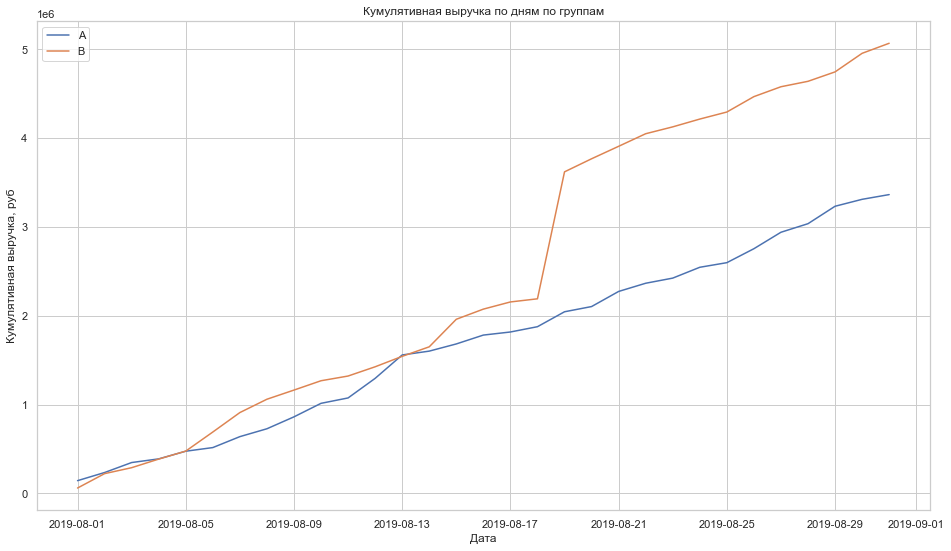

In [31]:
plt.figure(figsize =(16, 9))

sns.lineplot(cum_revenue_all['date'], cum_revenue_all['revenue_a'], label='A')

sns.lineplot(cum_revenue_all['date'], cum_revenue_all['revenue_b'], label='B')

plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка, руб')
plt.title('Кумулятивная выручка по дням по группам')

plt.legend()
plt.show()

Примерно в середине теста наблюдается резкий скачёк выручки в группе B. Это может свидетельствовать о выбросах, обнаруженных в предобработке. Они могут исказить результаты теста. Без их влияния, возможно, выручка в обеих группах будет примерно равна. 

### Кумулятивный средний чек по группам

c:\users\andrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\andrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


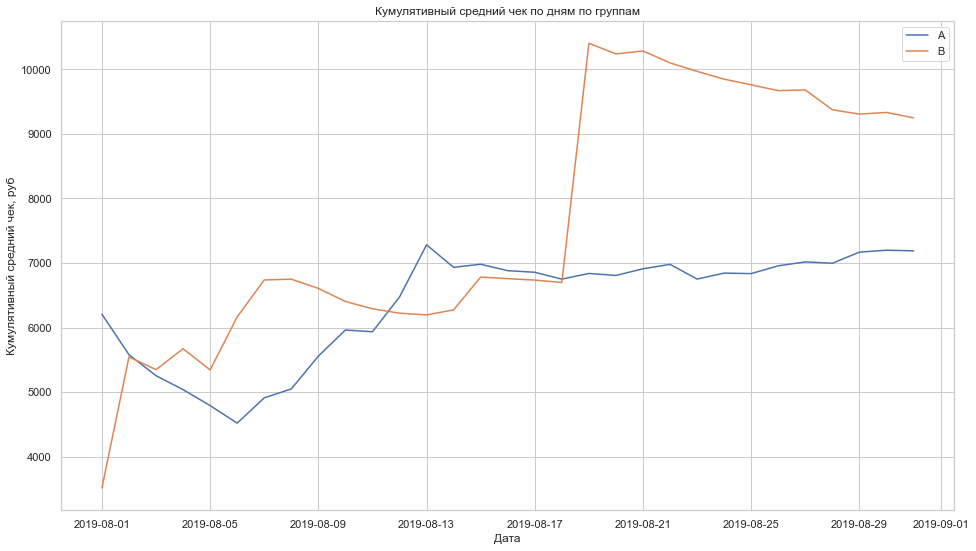

In [32]:
plt.figure(figsize =(16, 9))

sns.lineplot(cum_revenue_all['date'], 
         cum_revenue_all['revenue_a']/cum_revenue_all['orders_a'], 
         label='A')

sns.lineplot(cum_revenue_all['date'], 
         cum_revenue_all['revenue_b']/cum_revenue_all['orders_b'], 
         label='B')

plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек, руб')
plt.title('Кумулятивный средний чек по дням по группам')

plt.legend() 
plt.show()

Здесь мы так же наблюдаем резкий скачёк среднего чека в группе B. Исключив выбросы, данные выровняются.

###  Относительное изменение кумулятивного среднего чека группы B к группе A

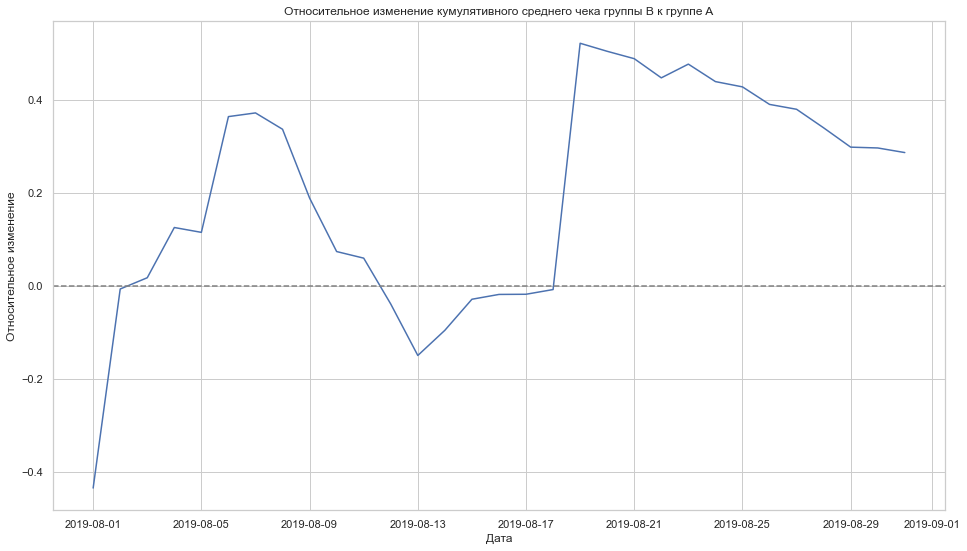

In [33]:
plt.figure(figsize =(16, 9))

sns.lineplot(data = cum_revenue_all,
             x = 'date', 
         y=(cum_revenue_all['revenue_b']/cum_revenue_all['orders_b'])\
            /(cum_revenue_all['revenue_a']/cum_revenue_all['orders_a'])-1)

plt.axhline(y=0, color='grey', linestyle='--') 

plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
 
plt.show()

В начале теста в группе A был провал по среднему чеку, но с середины, он выровнялся. Резкий скачёк в относительном изменении среднего чека является следствием выбросов. 


### Кумулятивная конверсия по группам

c:\users\andrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\andrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


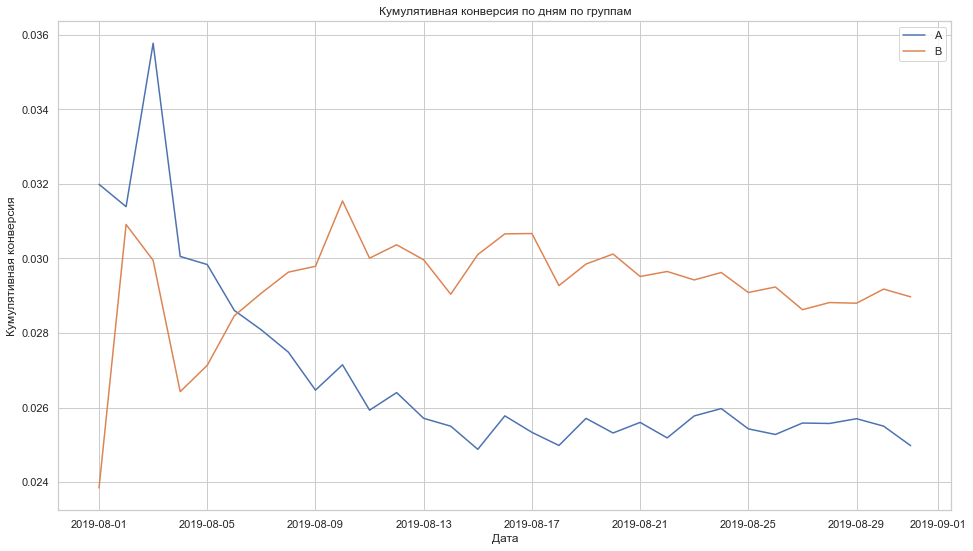

In [34]:
plt.figure(figsize =(16, 9))

sns.lineplot(cum_revenue_all['date'], cum_revenue_all['conversion_a'], label='A')

sns.lineplot(cum_revenue_all['date'], cum_revenue_all['conversion_b'], label='B')

plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title('Кумулятивная конверсия по дням по группам')

plt.legend()
plt.show()

Кумулятивная конверсия с середины теста показывает устоявшуюся картину. Группа B чувствует себя лучше.


### Относительное изменение кумулятивной конверсии группы B к группе A

c:\users\andrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


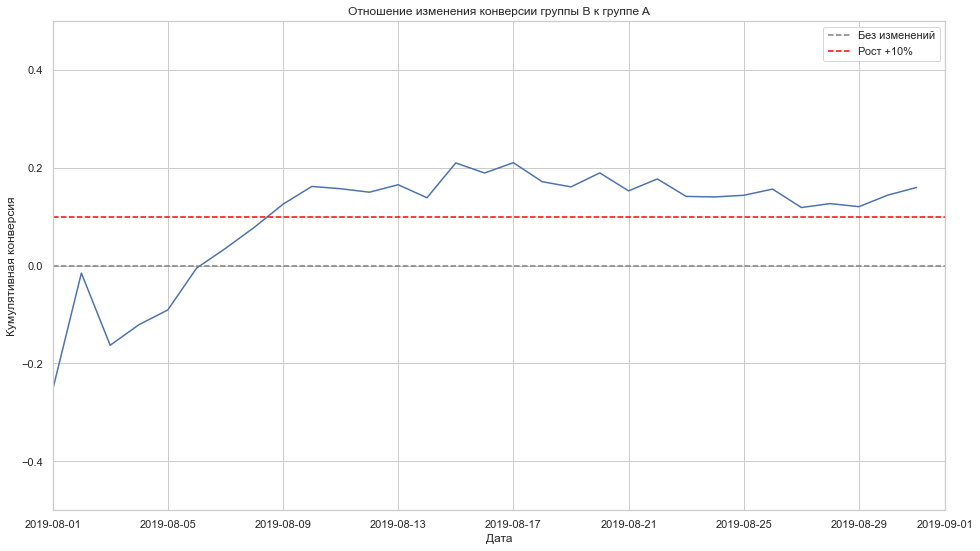

In [35]:
plt.figure(figsize =(16, 9))

sns.lineplot(cum_revenue_all['date'], 
             cum_revenue_all['conversion_b']/cum_revenue_all['conversion_a']-1)

plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.title('Отношение изменения конверсии группы B к группе A')

plt.axhline(y=0, color='grey', linestyle='--', label='Без изменений')
plt.axhline(y=0.1, color='red', linestyle='--', label='Рост +10%')
plt.axis(['2019-08-01', '2019-09-01', -0.5, 0.5]) 
plt.legend()
plt.show()

Группа B показывает хорошее отношение изменения конверсии к группе A, более чем в +10%. 

## Точечные графики и выбросы

### Точечный график количества покупок по пользователям

c:\users\andrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


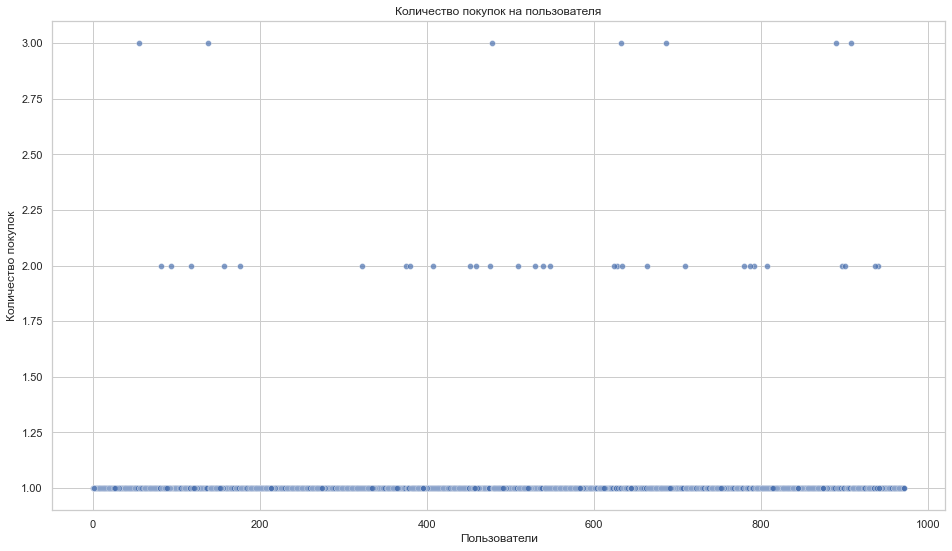

95 перцентиль количества покупок - 1.0
99 перцентиль количества покупок - 2.0


In [36]:
# Проверим количество покупок на пользователя на выбросы
users_orders = (orders.groupby('visitor_id', as_index=False)
                 .agg(orders=('transaction_id', pd.Series.nunique))
                 .sort_values(by='orders', ascending=False)
                )

plt.figure(figsize =(16, 9))

sns.scatterplot(users_orders.index, users_orders['orders'], alpha=0.7) 

plt.xlabel('Пользователи')
plt.ylabel('Количество покупок')
plt.title('Количество покупок на пользователя')

plt.show()

print('95 перцентиль количества покупок - {}'.format(users_orders['orders'].quantile(.95)))
print('99 перцентиль количества покупок - {}'.format(users_orders['orders'].quantile(.99)))

Почти все пользователи предпочитают делать не более 1 покупки. 2 и более покупок совершают только 1% покупателей.

### Точечный график стоимости заказов

c:\users\andrey\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


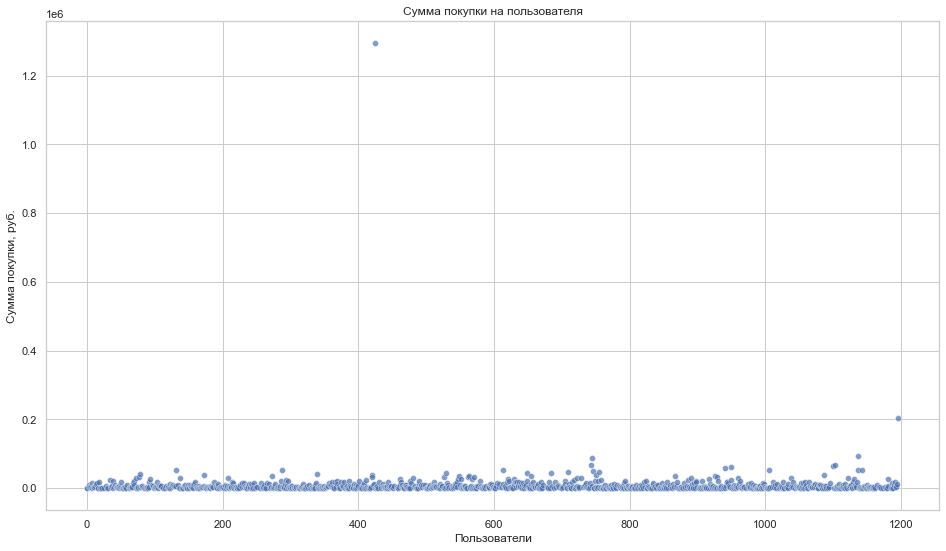

95 перцентиль стоимости покупок - 26785.0
99 перцентиль стоимости покупок - 53904.0


In [37]:
# Проверим revenue на выбросы
plt.figure(figsize =(16, 9))

sns.scatterplot(orders.index, orders['revenue'], alpha=0.7) 

plt.xlabel('Пользователи')
plt.ylabel('Сумма покупки, руб.')
plt.title('Сумма покупки на пользователя')

plt.show()

print('95 перцентиль стоимости покупок - {}'.format(orders['revenue'].quantile(.95)))
print('99 перцентиль стоимости покупок - {}'.format(orders['revenue'].quantile(.99)))

99% пользователей совершили покупки стоимостью до 54000 руб. На графике же мы видим уникальный чек сразу на 1,25 млн. руб. Вот мы и нашли тот самый выброс, который исказил нам всю картину в группе B. 

## Проверим гипотезы
###  H<sub>0</sub> - разница конверсии между группами по «сырым» данным статистически незначительна

In [38]:
# Посчтиаем уникальные покупки на пользователя в каждой группе
orders_a = (orders[orders['group'] == 'A']
                  .groupby('visitor_id')
                  .agg(orders=('transaction_id',pd.Series.nunique))
                  .reset_index())

orders_b = (orders[orders['group'] == 'B']
                  .groupby('visitor_id')
                  .agg(orders=('transaction_id',pd.Series.nunique))
                  .reset_index())

In [39]:
# Создадим отдельную табличку с посетителями в каждой группе по дням
visitors_group = pd.pivot_table(visitors, values='visitors', index='date', columns='group').reset_index()
visitors_group.columns = ['date', 'visitors_a', 'visitors_b']

In [40]:
# Объявим переменные в которых пользователям с заказами будет соответствовать число заказов пользователя. 
# А пользователям без заказов — нули
sample_a = pd.concat([orders_a['orders'], pd.Series(0,
                    index=np.arange(visitors_group['visitors_a'].sum()
                    - len(orders_a['orders'])), name='orders')],
                    axis=0)

sample_b = pd.concat([orders_b['orders'], pd.Series(0,
                    index=np.arange(visitors_group['visitors_b'].sum()
                    - len(orders_b['orders'])), name='orders')],
                    axis=0)

In [41]:
print('Стат. значимость конверсии: {0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b, alternative='two-sided')[1]))
print('Отношение конверсии группы B к A: {0:.3f}'.format(sample_b.mean() / sample_a.mean() - 1))

Стат. значимость конверсии: 0.011
Отношение конверсии группы B к A: 0.160


Отвергаем H<sub>0</sub> - конверсия между группами по «сырым» данным статистически значима. Отношение конверсии группы B к A: 16%.


### H<sub>0</sub> - разница среднего чек заказа между группами по «сырым» данным  статистически незначительна

In [42]:
# Объявим переменные в которых будет информация по выручке по каждой группе
revenue_a = orders[orders['group']=='A']['revenue']
revenue_b = orders[orders['group']=='B']['revenue']

In [43]:
print('Стат. значимость среднего чека: {0:.3f}'.format(stats.mannwhitneyu(revenue_a, revenue_b, alternative='two-sided')[1]))
print('Отношение среднего чека группы B к группе A: {0:.3f}'.format(revenue_b.mean() / revenue_a.mean() - 1)) 

Стат. значимость среднего чека: 0.829
Отношение среднего чека группы B к группе A: 0.287


Не отвергаем гипотезу, нельзя сделать вывод о различии среднего чека заказа между группами по сырым данным. Положительное отношение среднего чека группы B к A в 28%. Явно сыграли злую шутку найденные выбросы!

###  H<sub>0</sub> - разница конверсии между группами по «очищенным» данным статистически незначительна

In [44]:
# Найдем аномальных пользователей с большим количеством заказов.
users_many_orders = pd.concat([orders_a[orders_a['orders'] >= 2]['visitor_id'],
                               orders_b[orders_b['orders'] >= 2]['visitor_id']], 
                              axis=0)

# С большим чеком.
users_expens_orders = orders[orders['revenue'] > 30000]['visitor_id']

# Объеденим аномальных пользователей.
abnormal_users = (pd.concat([users_many_orders, users_expens_orders],axis=0)
                 .drop_duplicates()
                 .sort_values())

In [45]:
# Очистим конверсию от аномальных пользователей.
sample_a_filtered = pd.concat([orders_a[~(orders_a['visitor_id'].isin(abnormal_users))]['orders'], 
                               pd.Series(0,
                               index=np.arange(visitors_group['visitors_a'].sum() - len(orders_a['orders'])), 
                               name='orders')], axis=0)

sample_b_filtered = pd.concat([orders_b[~(orders_b['visitor_id'].isin(abnormal_users))]['orders'], 
                               pd.Series(0,
                               index=np.arange(visitors_group['visitors_b'].sum()- len(orders_b['orders'])), 
                               name='orders')], axis=0)

In [46]:
print('Стат. значимость конверсии: {0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered, alternative='two-sided')[1]))
print('Отношение конверсии группы B к A: {0:.3f}'.format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1)) 

Стат. значимость конверсии: 0.013
Отношение конверсии группы B к A: 0.180


После очищения данных от аномальных пользователей, значения конверсии практически не изменились. Отвергаем H<sub>0</sub>, конверсия статистически значимая. Положительное отношение конверсии группы B к группе A - 18%.


### H<sub>0</sub> - разница среднего чека заказа между группами по «очищенным» данным статистически незначима

In [47]:
# Очистим средний чек от аномальных пользователей.
revenue_filtered_a = orders[(orders['group'] == 'A')&(~orders['visitor_id'].isin(abnormal_users))]['revenue']

revenue_filtered_b = orders[(orders['group'] == 'B')&(~orders['visitor_id'].isin(abnormal_users))]['revenue']

In [48]:
print('Стат. значимость среднего чека: {0:.3f}'.format(stats.mannwhitneyu(revenue_filtered_a, revenue_filtered_b, alternative='two-sided')[1]))
print('Отношение среднего чека группы B к группе A: {0:.3f}'.format(revenue_filtered_b.mean() / revenue_filtered_a.mean() - 1)) 

Стат. значимость среднего чека: 0.829
Отношение среднего чека группы B к группе A: -0.011


После очищения данных от аномальных пользователей, значение отношения среднего чека, группы B к группе A, сильно поменялось в противополжную сторону. Если с выбросами, группа B сильно вырывалась вперед на 28%, то сейчас различие составило -1%. При этом, гипотезу о разницы среднего чека не отвергаем, статистической значимости нет. 

## Решение по результатам теста

Останавливаем тест. Целью теста было увеличение выручки интернет-магазина. В этой задаче, победителя нет. Нет статистической значимости в среднем чеке. При этом конверсия значимо выросла на 18% в группе B.

# Выводы




Нашли 58 пользователей, чьи покупки попали в обе группы.
В начале теста в группе A был провал по среднему чеку, но с середины, он выровнялся.
Примерно в середине теста наблюдается резкий скачёк выручки в группе B.
Кумулятивная конверсия с середины теста показывает устоявшуюся картину. Группа B чувствует себя лучше.
Группа B показывает хорошее отношение изменения конверсии к группе A, более чем в +10%.
Почти все пользователи предпочитают делать не более 1 покупки. 2 и более покупок совершают только 1% покупателей.
99% пользователей совершили покупки стоимостью до 54000 руб.


По сырым данным, мы имеем статистически значимое, положительное отношение конверсии группы B к A в 16%
По сырым данным, статистически не значимое, положительное отношение среднего чека группы B к A в 28%.
После очищения данных от аномальных пользователей, значения конверсии практически не изменились. Фиксируем статистическую значимость, положительного отношения конверсии группы B к группе A в 18%.
Значение отношения среднего чека, группы B к группе A, сильно поменялось в противополжную сторону. Если с выбросами, группа B сильно вырывалась вперед на 28%, то сейчас различие составило -1%. При этом статистической значимости нет.

Тест останавливаем и признаем успешным с повышением конверсии на 18%. 


